# Model Metrics Visualization

This notebook visualizes precision, recall, and F1 scores for labels 0-5 from saved model metrics.

### Setup

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
from typing import List, Tuple

sys.path.append(str(Path.cwd().parent.parent))
from evaluation.core import (
    vis_specific_model_tables,
    vis_specific_model_conf_matrices,
    vis_all_models_plots,
    vis_all_models_tables,
    format_metrics_for_latex,
)
from evaluation.encoder.interface import (
    encoder_metrics_to_core,
    get_encoder_model_groups,
)
from evaluation.encoder.helpers import (
    aggregate_metrics_by_model,
    sort_aggregated_models,
    load_cv_history_files,
    load_train_history_files,
    visualize_metric_files,
)

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 5)

### List metrics

In [19]:
encoder_models_raw = aggregate_metrics_by_model()
encoder_models_raw = sort_aggregated_models(encoder_models_raw)
aggregated_models = encoder_metrics_to_core(encoder_models_raw)

print(f"\nFound {len(aggregated_models)} model configurations:")
for i, m in enumerate(aggregated_models):
    splits = [s for s in ["train", "val", "test"] if getattr(m, s, None) is not None]
    print(f"  [{i}] {m.model} (splits: {', '.join(splits) if splits else 'none'})")


Found 19 model configurations:
  [0] random (splits: train, val, test)
  [1] random_lg (splits: train, val, test)
  [2] ridge_minilm (splits: train, val, test)
  [3] ridge_minilm_lg (splits: train, val, test)
  [4] ridge_mbert (splits: train, val, test)
  [5] ridge_mbert_lg (splits: train, val, test)
  [6] rf_minilm (splits: train, val, test)
  [7] rf_minilm_lg (splits: train, val, test)
  [8] rf_mbert (splits: train, val, test)
  [9] rf_mbert_lg (splits: train, val, test)
  [10] svm_minilm (splits: train, val, test)
  [11] svm_mbert (splits: train, val, test)
  [12] catboost_minilm (splits: train, val, test)
  [13] catboost_minilm_lg (splits: train, val, test)
  [14] catboost_mbert (splits: train, val, test)
  [15] catboost_mbert_lg (splits: train, val, test)
  [16] finetuned-mbert (splits: train, val, test)
  [17] finetuned-mbert_lg (splits: train, val, test)
  [18] finetuned-mbert_lg-only (splits: train, test)


## Specific model

In [21]:
MODEL_INDEX = 17
metrics_data = aggregated_models[MODEL_INDEX]

print(f"Model: {metrics_data.model}")

Model: finetuned-mbert_lg


In [8]:
vis_specific_model_tables(metrics_data)

TRAIN METRICS


,Label,Precision,Recall,F1,Support
0,0,1.0000,1.0000,1.0000,73
1,1,1.0000,1.0000,1.0000,42
2,2,1.0000,1.0000,1.0000,68
3,3,1.0000,1.0000,1.0000,79
4,4,1.0000,1.0000,1.0000,65
5,5,1.0000,1.0000,1.0000,65


Accuracy: 1.0000
MSE: 0.0242

CROSS-VALIDATION METRICS (Averaged Across Folds)


,Label,Precision,Recall,F1,Support
0,0,0.8667,0.2048,0.3300,73
1,1,0.2194,0.4528,0.2952,42
2,2,0.3856,0.5901,0.4625,68
3,3,0.5133,0.5450,0.5212,79
4,4,0.7255,0.4615,0.5476,65
5,5,0.9657,0.8308,0.8867,65


Accuracy: 0.5129
MSE: 0.6918

TEST METRICS


,Label,Precision,Recall,F1,Support
0,0,0.6667,0.0816,0.1455,49
1,1,0.1897,0.3929,0.2558,28
2,2,0.3333,0.5556,0.4167,45
3,3,0.5000,0.4231,0.4583,52
4,4,0.7561,0.7045,0.7294,44
5,5,1.0000,0.8636,0.9268,44


Accuracy: 0.5000
MSE: 0.7320

CROSS-VALIDATION METRICS - PER FOLD

--- Fold 1/5 ---


,Label,Precision,Recall,F1,Support
0,0,1.0000,0.2000,0.3333,15
1,1,0.2500,0.5556,0.3448,9
2,2,0.2941,0.3571,0.3226,14
3,3,0.4286,0.6000,0.5000,15
4,4,1.0000,0.3077,0.4706,13
5,5,0.9286,1.0000,0.9630,13


Accuracy: 0.4937
MSE: 0.6423

--- Fold 2/5 ---


,Label,Precision,Recall,F1,Support
0,0,0.3333,0.0714,0.1176,14
1,1,0.1667,0.3333,0.2222,9
2,2,0.3600,0.6429,0.4615,14
3,3,0.5000,0.3750,0.4286,16
4,4,0.7273,0.6154,0.6667,13
5,5,1.0000,0.7692,0.8696,13


Accuracy: 0.4684
MSE: 0.8228

--- Fold 3/5 ---


,Label,Precision,Recall,F1,Support
0,0,1.0000,0.2857,0.4444,14
1,1,0.2222,0.5000,0.3077,8
2,2,0.3913,0.6429,0.4865,14
3,3,0.5714,0.5000,0.5333,16
4,4,0.5556,0.3846,0.4545,13
5,5,0.9000,0.6923,0.7826,13


Accuracy: 0.5000
MSE: 0.6696

--- Fold 4/5 ---


,Label,Precision,Recall,F1,Support
0,0,1.0000,0.2000,0.3333,15
1,1,0.3333,0.6250,0.4348,8
2,2,0.5625,0.6923,0.6207,13
3,3,0.6667,0.8750,0.7568,16
4,4,0.9000,0.6923,0.7826,13
5,5,1.0000,1.0000,1.0000,13


Accuracy: 0.6795
MSE: 0.5492

--- Fold 5/5 ---


,Label,Precision,Recall,F1,Support
0,0,1.0000,0.2667,0.4211,15
1,1,0.1250,0.2500,0.1667,8
2,2,0.3200,0.6154,0.4211,13
3,3,0.4000,0.3750,0.3871,16
4,4,0.4444,0.3077,0.3636,13
5,5,1.0000,0.6923,0.8182,13


Accuracy: 0.4231
MSE: 0.7753


TRAIN SET CONFUSION MATRIX


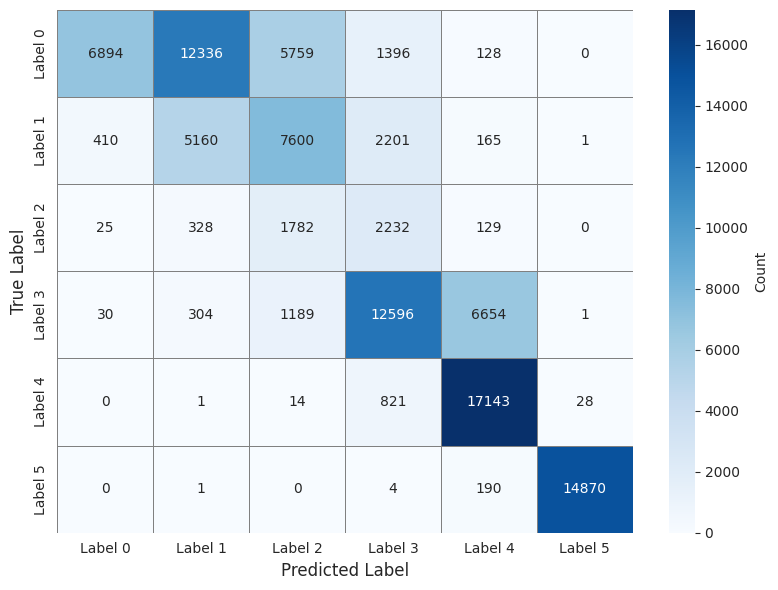


Confusion Matrix Statistics:
  Total predictions: 100392
  Correct predictions (diagonal): 58445
  Incorrect predictions (off-diagonal): 41947
  Accuracy: 0.5822

Per-label statistics:
  Label 0: 6894/26513 correct (26.00%)
  Label 1: 5160/15537 correct (33.21%)
  Label 2: 1782/4496 correct (39.64%)
  Label 3: 12596/20774 correct (60.63%)
  Label 4: 17143/18007 correct (95.20%)
  Label 5: 14870/15065 correct (98.71%)

CROSS-VALIDATION CONFUSION MATRIX


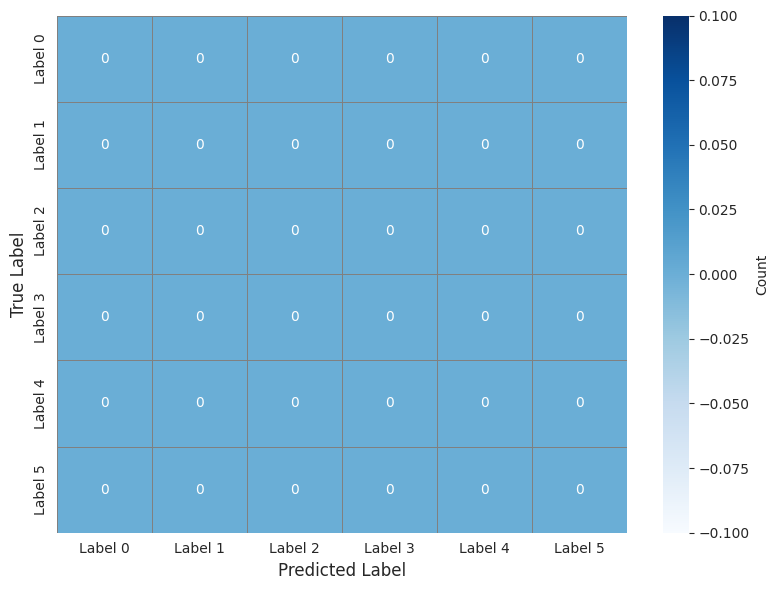


Confusion Matrix Statistics:
  Total predictions: 0
  Correct predictions (diagonal): 0
  Incorrect predictions (off-diagonal): 0
  Accuracy: 0.0000

Per-label statistics:
  Label 0: No samples
  Label 1: No samples
  Label 2: No samples
  Label 3: No samples
  Label 4: No samples
  Label 5: No samples

TEST SET CONFUSION MATRIX


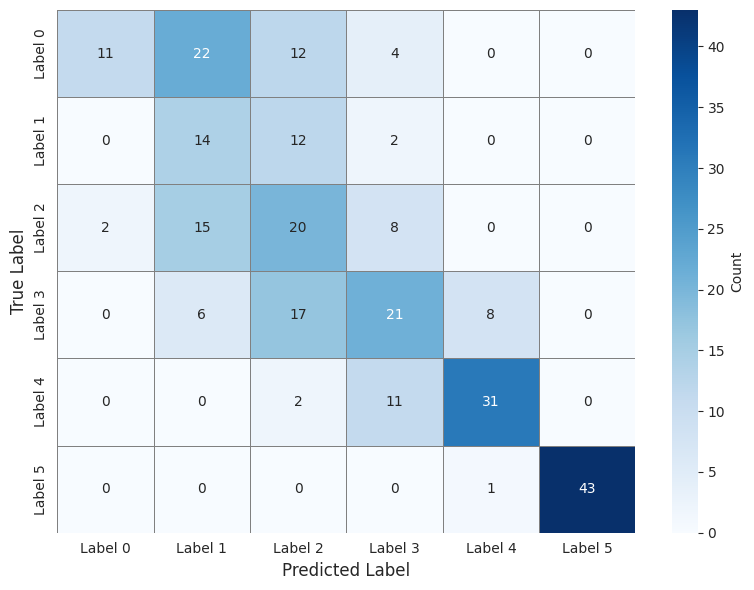


Confusion Matrix Statistics:
  Total predictions: 262
  Correct predictions (diagonal): 140
  Incorrect predictions (off-diagonal): 122
  Accuracy: 0.5344

Per-label statistics:
  Label 0: 11/49 correct (22.45%)
  Label 1: 14/28 correct (50.00%)
  Label 2: 20/45 correct (44.44%)
  Label 3: 21/52 correct (40.38%)
  Label 4: 31/44 correct (70.45%)
  Label 5: 43/44 correct (97.73%)


In [16]:
vis_specific_model_conf_matrices(
    metrics_data, show_proportional=False, show_title=False
)

## All models

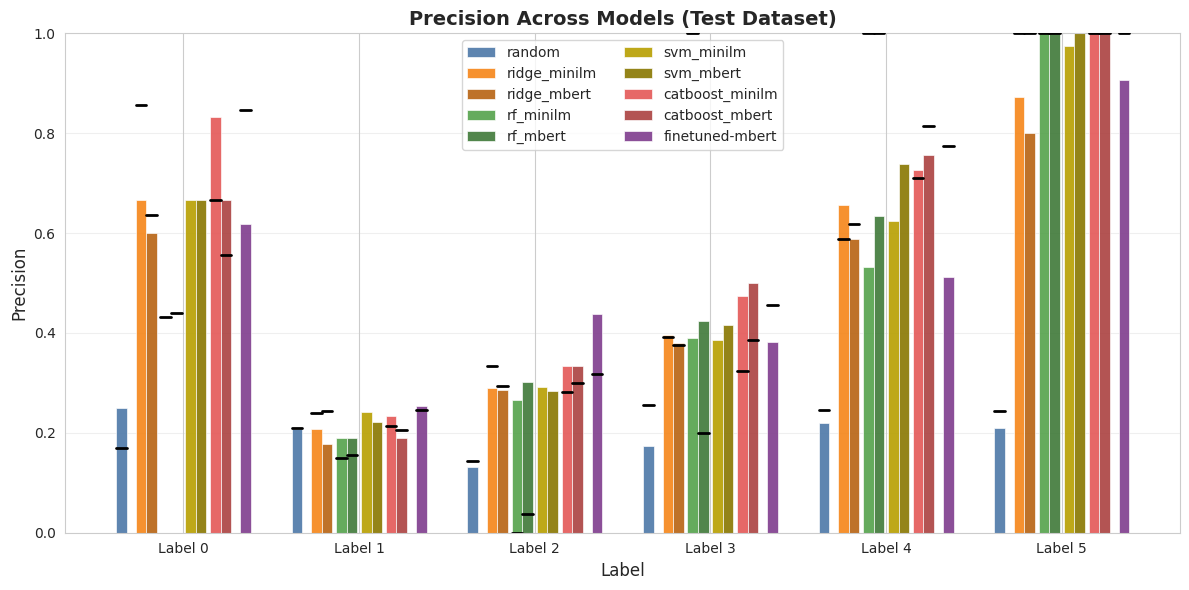

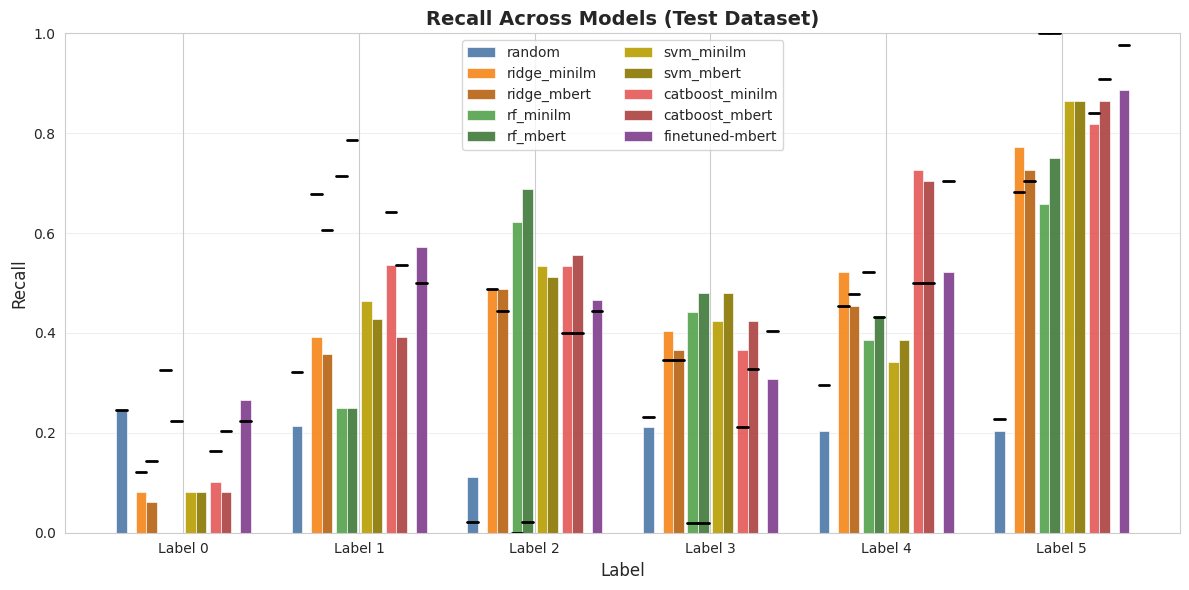

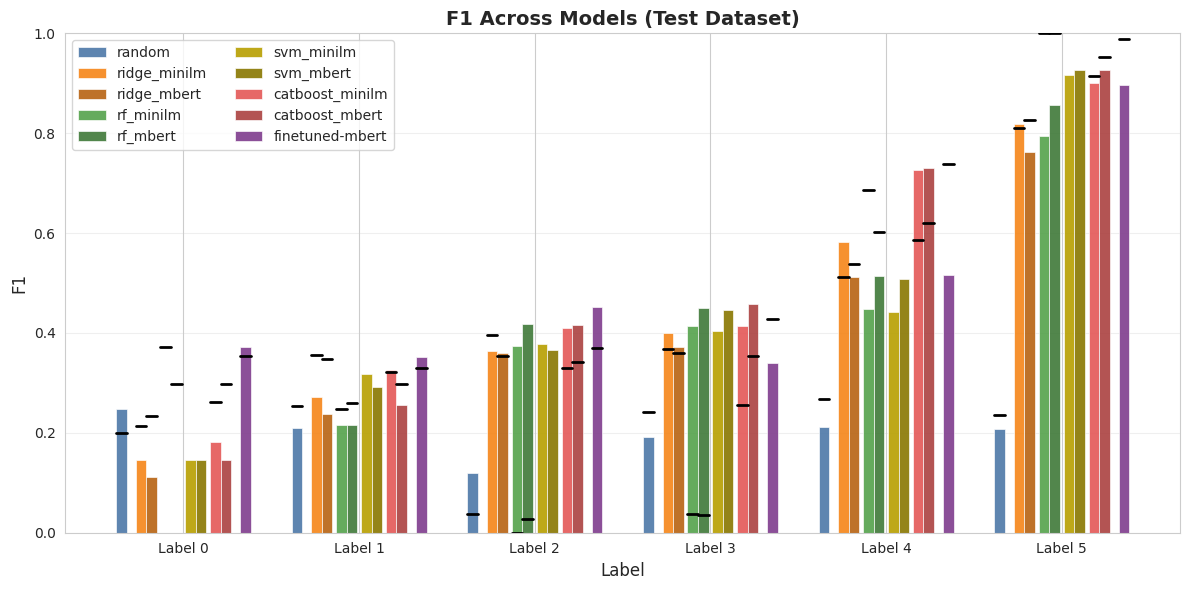

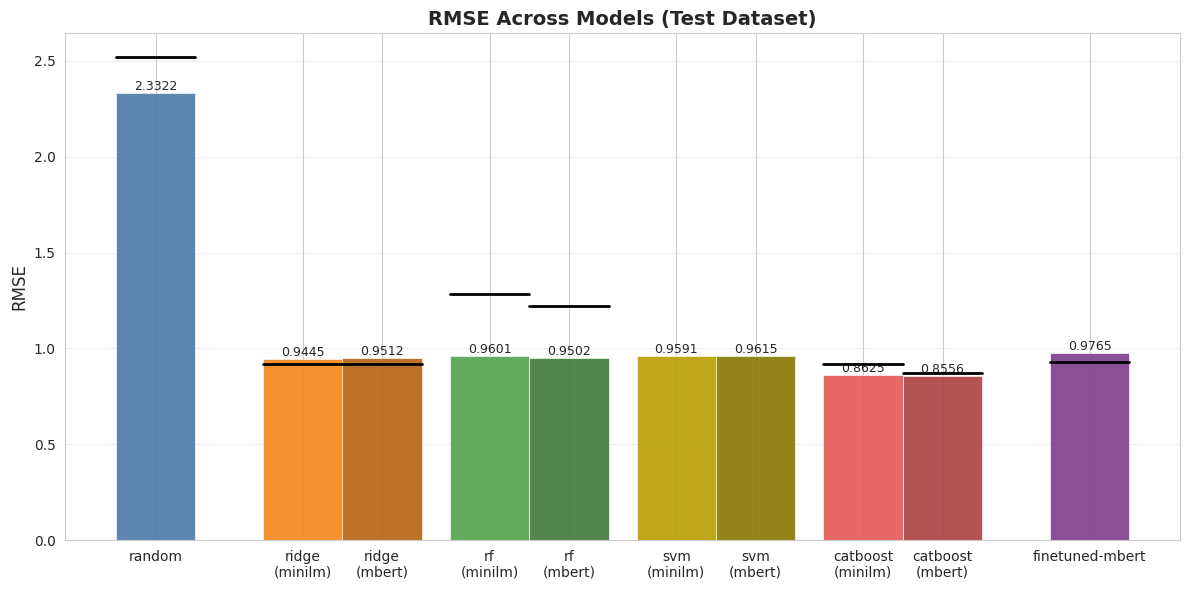

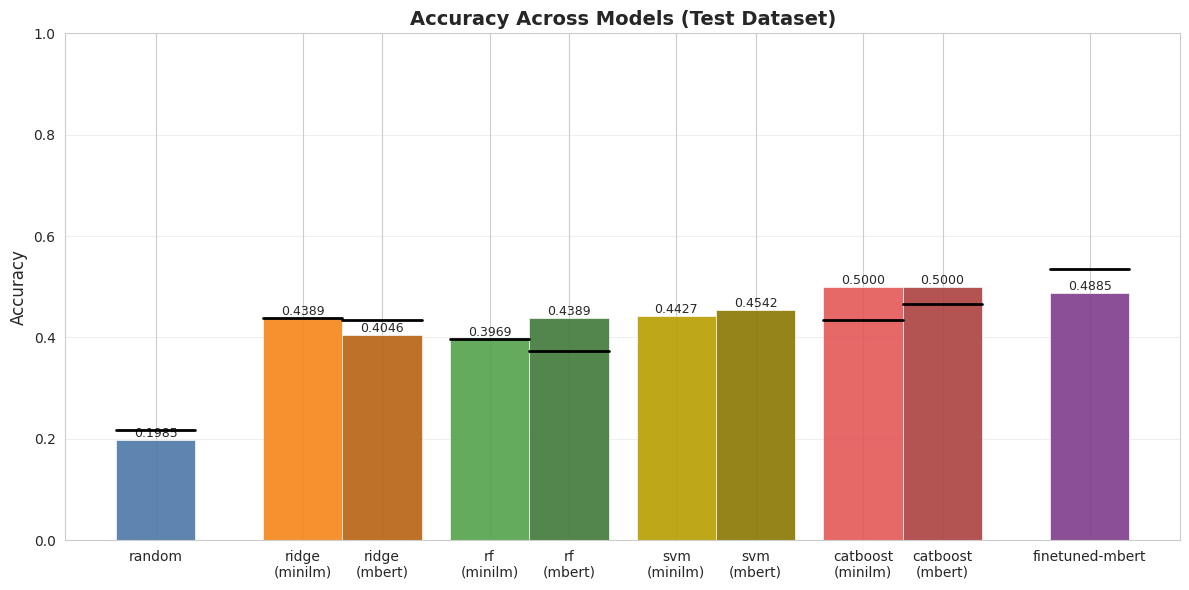

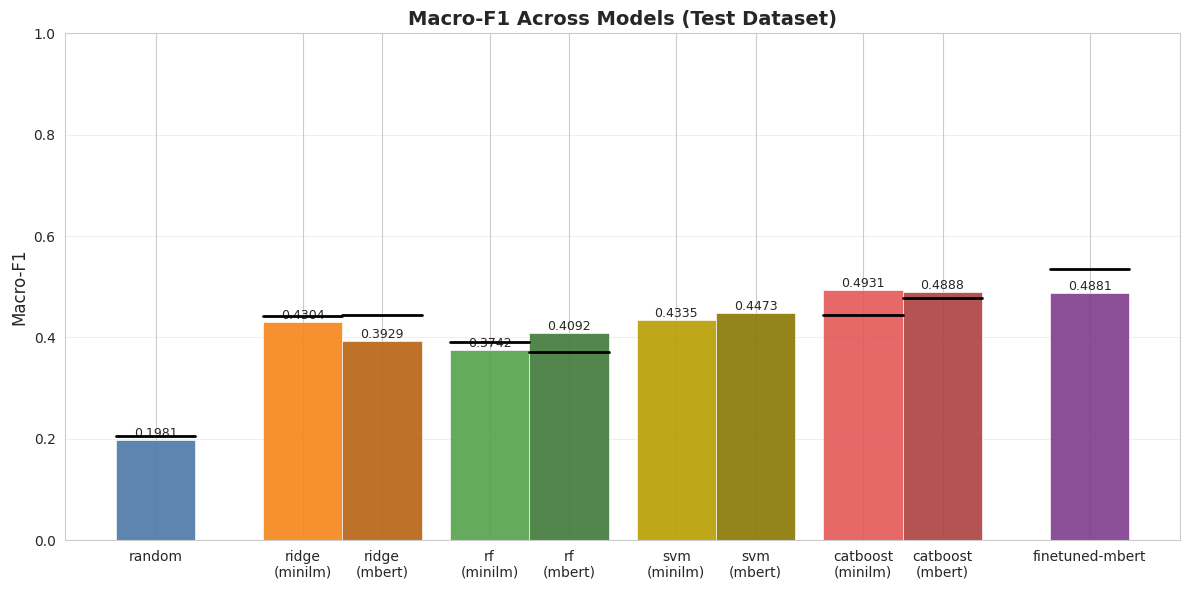

In [19]:
vis_all_models_plots(aggregated_models, "test")

In [23]:
model_groups, show_large_variants = get_encoder_model_groups()
df_metrics = vis_all_models_tables(
    aggregated_models,
    ["RMSE", "Acc"],
    ["Train", "Test"],
    model_groups,
    show_large_variants,
)

latex_table = format_metrics_for_latex(df_metrics)
print(latex_table)

,Model,Train RMSE,Test RMSE,Train Acc,Test Acc
0,Random,2.3129,2.3322,0.1760,0.1985
1,(+Large),2.5940,2.5179,0.1937,0.2176
2,Ridge,,,,
3,MiniLM,0.5251,0.9445,0.6760,0.4389
4,MBERT,0.5226,0.9512,0.6607,0.4046
5,MiniLM (+Large),0.8127,0.9209,0.5056,0.4389
6,MBERT (+Large),0.7784,0.9166,0.5191,0.4351
7,RandomForest,,,,
8,MiniLM,0.1424,0.9601,0.9974,0.3969
9,MBERT,0.0320,0.9502,1.0000,0.4389


\begin{tabular}{rrrrr}
\toprule
\textbf{Model} & \textbf{Train RMSE} & \textbf{Test RMSE} & \textbf{Train Acc} & \textbf{Test Acc} \\
\midrule
\textbf{Random} & 2.3129 & 2.3322 & 0.1760 & 0.1985 \\
(+Large) & 2.5940 & 2.5179 & 0.1937 & 0.2176 \\
\textbf{Ridge} &  &  &  &  \\
MiniLM & 0.5251 & 0.9445 & 0.6760 & 0.4389 \\
MBERT & 0.5226 & 0.9512 & 0.6607 & 0.4046 \\
MiniLM (+Large) & 0.8127 & 0.9209 & 0.5056 & 0.4389 \\
MBERT (+Large) & 0.7784 & 0.9166 & 0.5191 & 0.4351 \\
\textbf{RandomForest} &  &  &  &  \\
MiniLM & 0.1424 & 0.9601 & 0.9974 & 0.3969 \\
MBERT & \textbf{0.0320} & 0.9502 & \textbf{1.0000} & 0.4389 \\
MiniLM (+Large) & 0.1702 & 1.2820 & 0.9802 & 0.3969 \\
MBERT (+Large) & 0.3779 & 1.2211 & 0.7978 & 0.3740 \\
\textbf{SVM} &  &  &  &  \\
MiniLM & 0.2477 & 0.9591 & 0.9260 & 0.4427 \\
MBERT & 0.2246 & 0.9615 & 0.9413 & 0.4542 \\
\textbf{CatBoost} &  &  &  &  \\
MiniLM & 0.1720 & 0.8625 & 0.9974 & 0.5000 \\
MBERT & 0.1554 & \textbf{0.8556} & \textbf{1.0000} & 0.5000 \\
MiniLM (

## Training and Validation Curves

In [21]:
cv_history_files = load_cv_history_files()
train_history_files = load_train_history_files()

combined_files: List[Tuple[str, Path]] = []
print("Available metric files:")

for idx, f in enumerate(cv_history_files):
    combined_files.append(("val", f))
    print(f"  [{idx}] val   - {f.name}")
train_start_idx = len(combined_files)

for offset, f in enumerate(train_history_files):
    idx = train_start_idx + offset
    combined_files.append(("train", f))
    print(f"  [{idx}] train - {f.name}")

Available metric files:
  [0] val   - finetuned-mbert_lg_val_42_2025-12-16-20-58-56.json
  [1] val   - finetuned-mbert_val_42_2025-12-16-21-53-53.json
  [2] train - finetuned-mbert_lg_train_42_2025-12-16-20-58-56.json
  [3] train - finetuned-mbert_train_42_2025-12-16-20-35-32.json


Plotting 2 training file(s)...
Plotting 1 validation file(s) across folds...


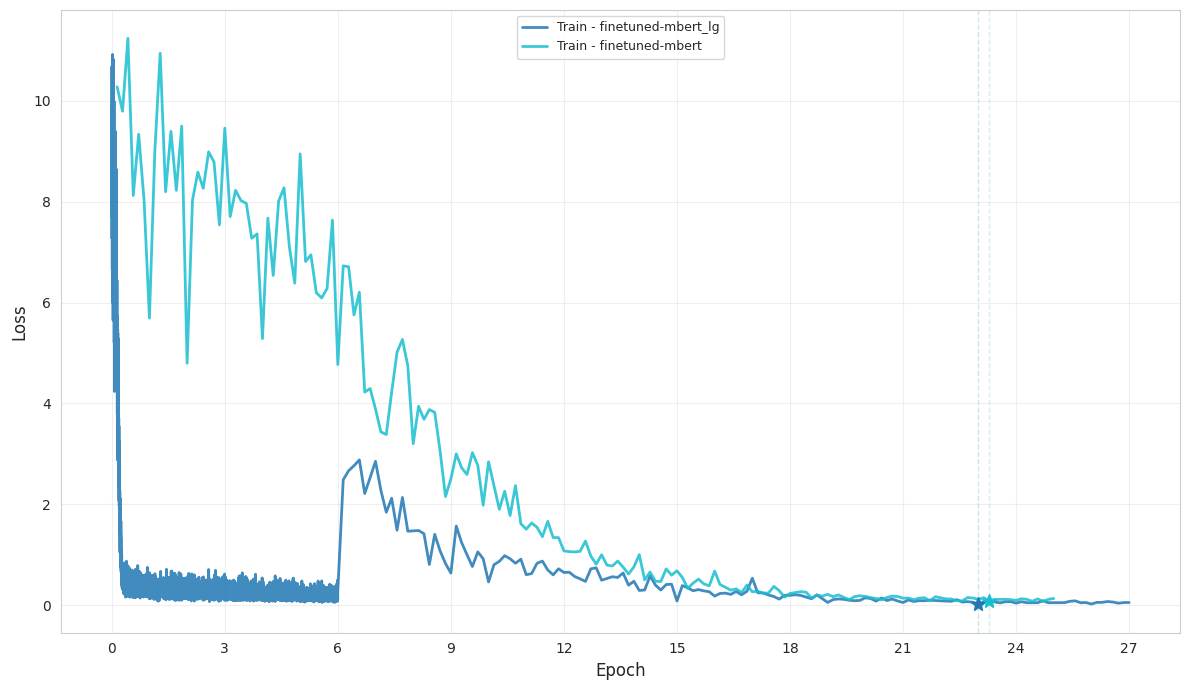

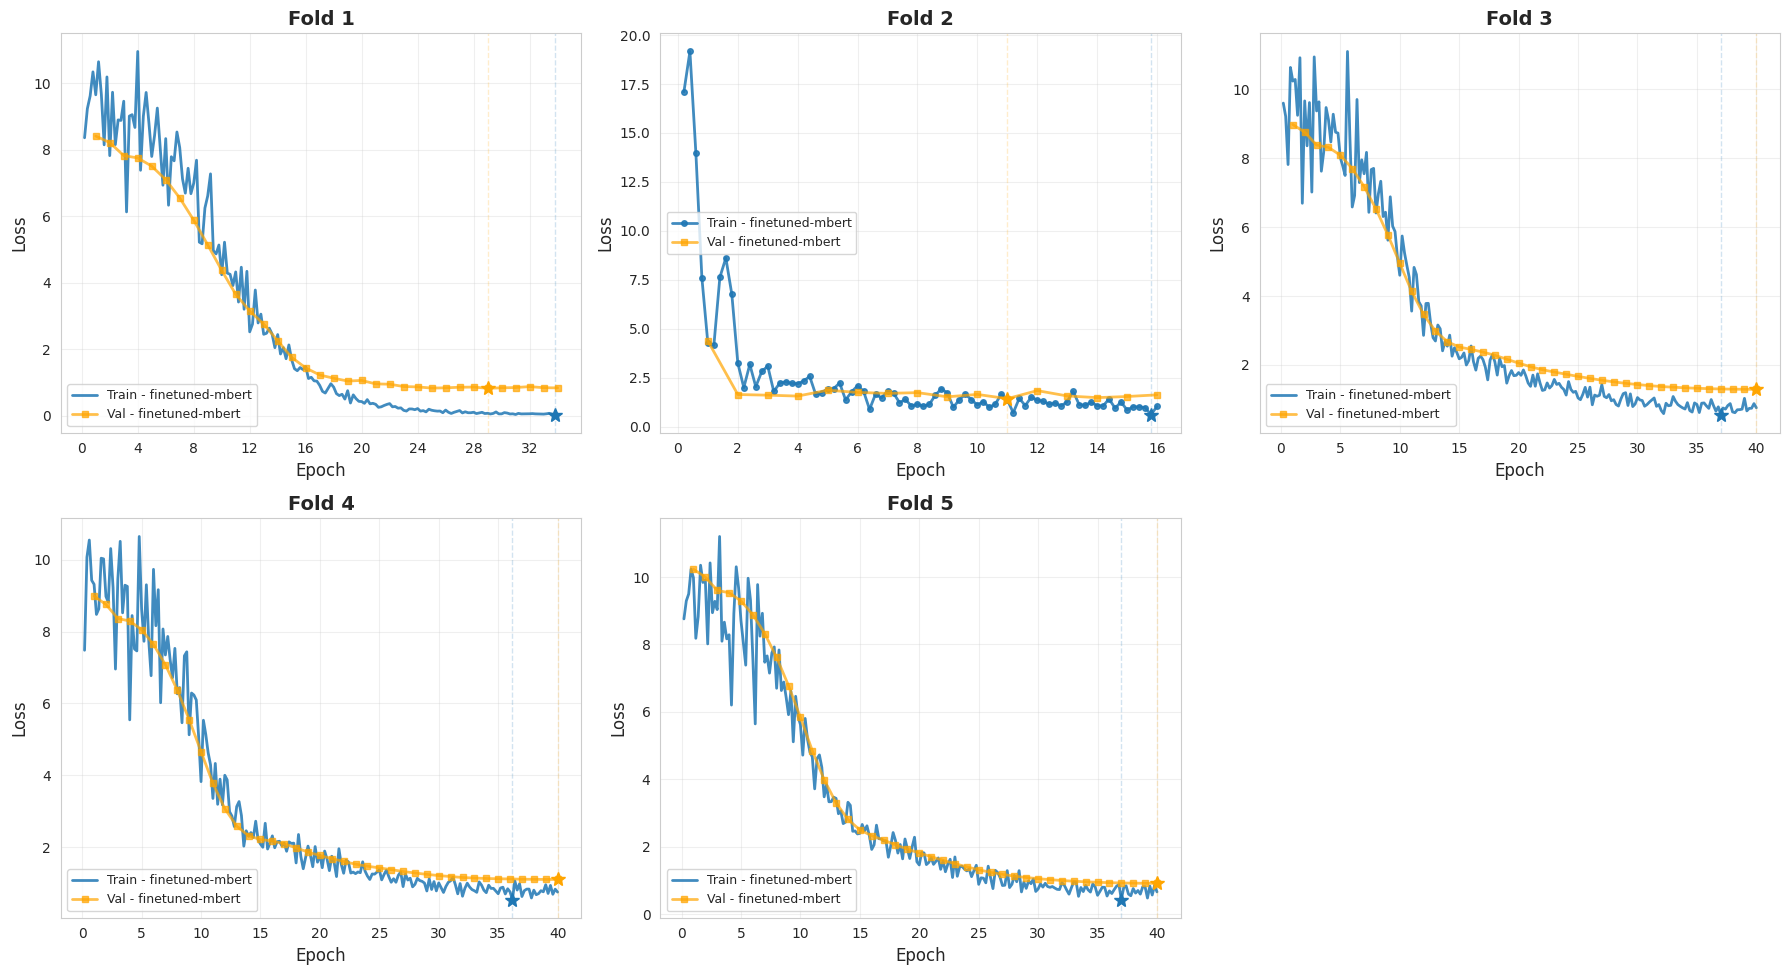

In [22]:
# Select metric files (train or val) by index and plot
SELECTED_FILE_INDICES = [1, 2, 3]  # e.g., [0, 3]
selected_paths = [
    combined_files[i][1] for i in SELECTED_FILE_INDICES if 0 <= i < len(combined_files)
]

visualize_metric_files(selected_paths)

## Relaxed Class Mode (merge 0/1, 2/3, 4/5)
These evaluations recompute metrics and confusion matrices after collapsing labels into three classes.

TRAIN SET CONFUSION MATRIX


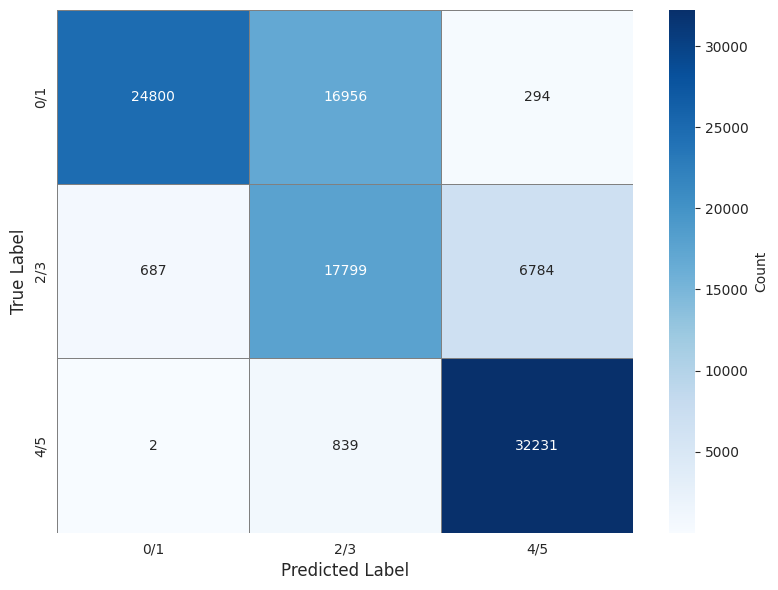


Confusion Matrix Statistics:
  Total predictions: 100392
  Correct predictions (diagonal): 74830
  Incorrect predictions (off-diagonal): 25562
  Accuracy: 0.7454

Per-label statistics:
  Label 0: 24800/42050 correct (58.98%)
  Label 1: 17799/25270 correct (70.44%)
  Label 2: 32231/33072 correct (97.46%)

CROSS-VALIDATION CONFUSION MATRIX


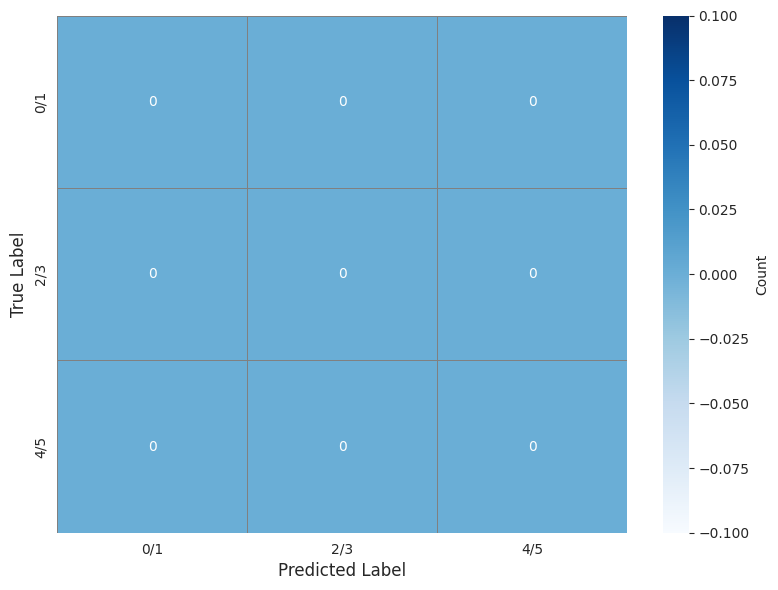


Confusion Matrix Statistics:
  Total predictions: 0
  Correct predictions (diagonal): 0
  Incorrect predictions (off-diagonal): 0
  Accuracy: 0.0000

Per-label statistics:
  Label 0: No samples
  Label 1: No samples
  Label 2: No samples

TEST SET CONFUSION MATRIX


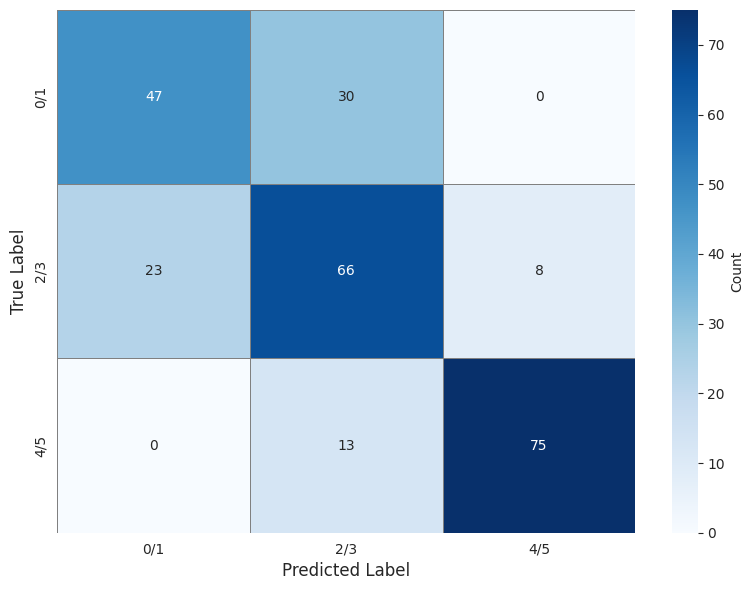


Confusion Matrix Statistics:
  Total predictions: 262
  Correct predictions (diagonal): 188
  Incorrect predictions (off-diagonal): 74
  Accuracy: 0.7176

Per-label statistics:
  Label 0: 47/77 correct (61.04%)
  Label 1: 66/97 correct (68.04%)
  Label 2: 75/88 correct (85.23%)


In [11]:
# Specific model: relaxed confusion matrices
vis_specific_model_conf_matrices(
    metrics_data, show_proportional=False, show_title=False, class_mode="relaxed"
)

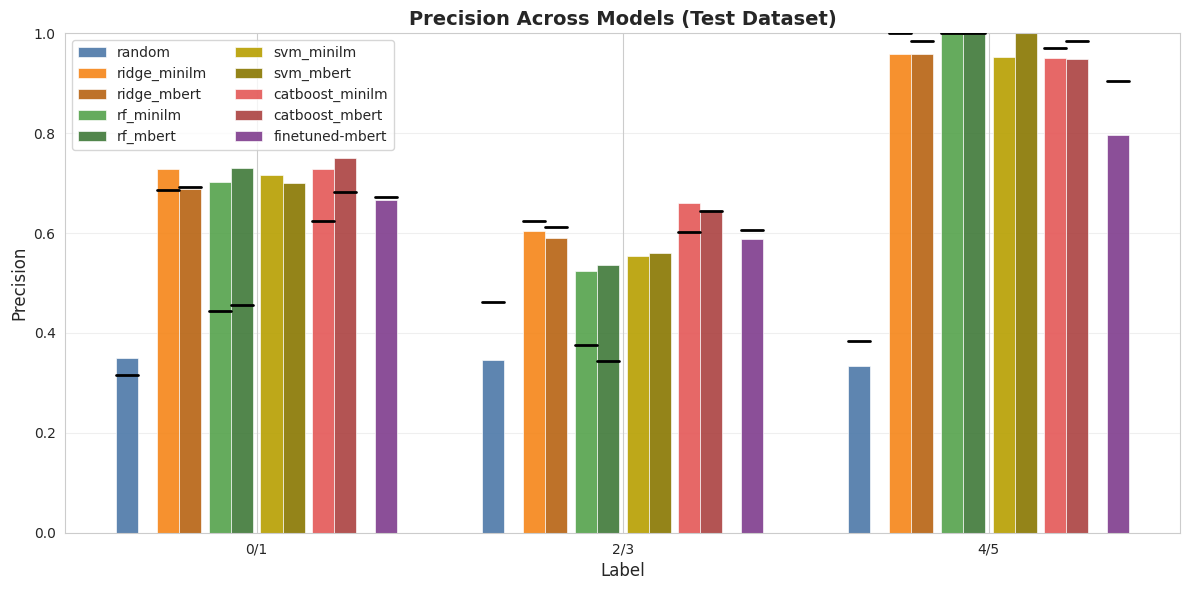

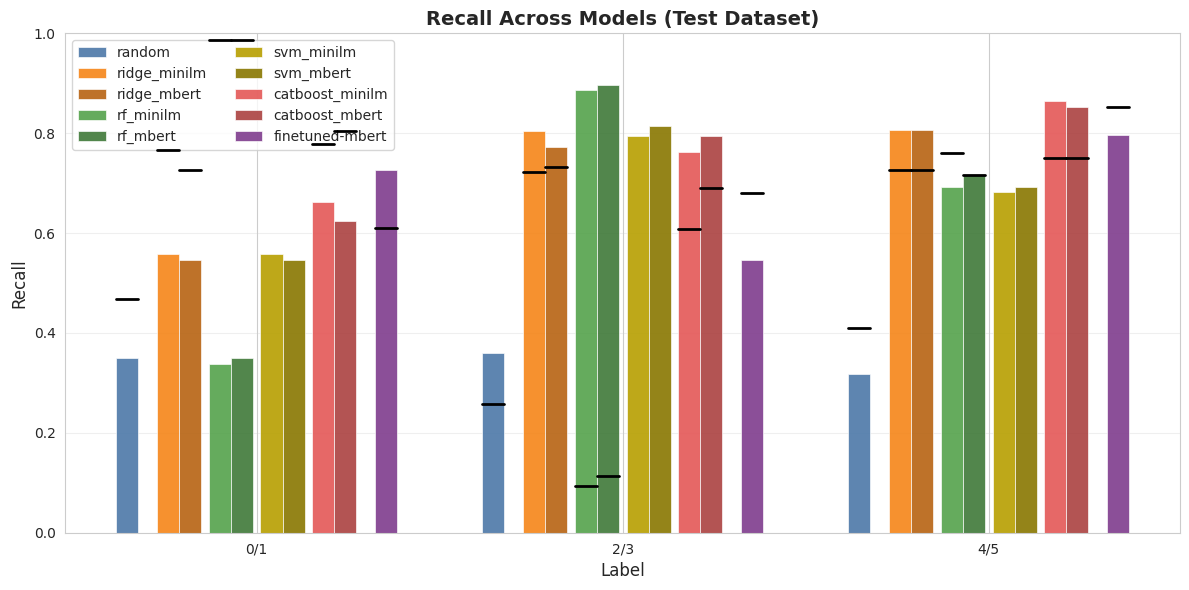

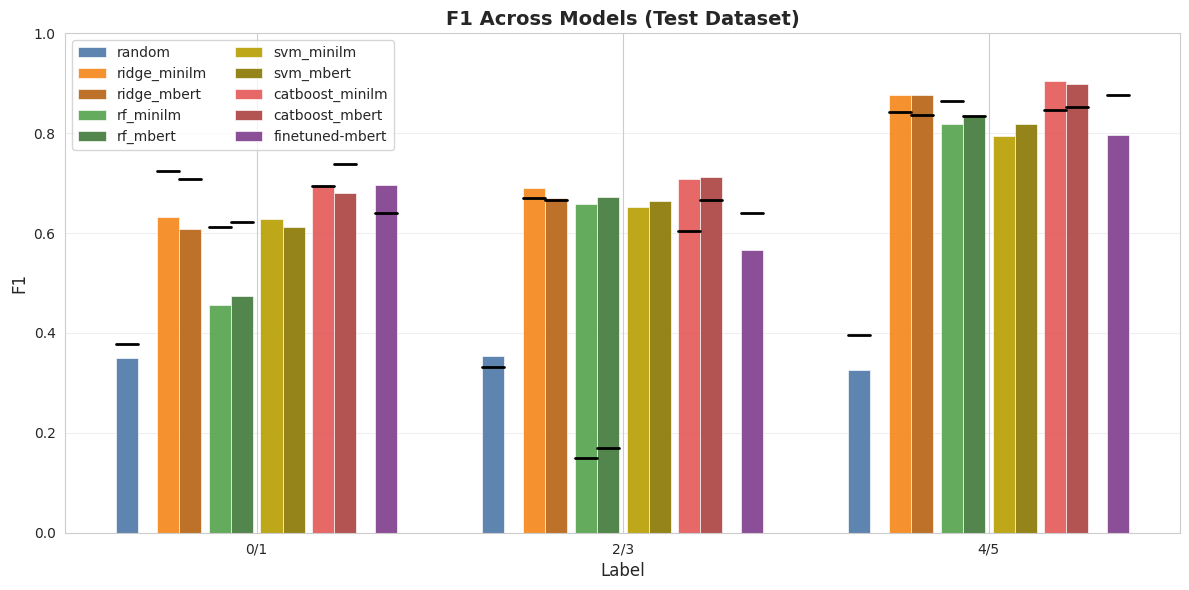

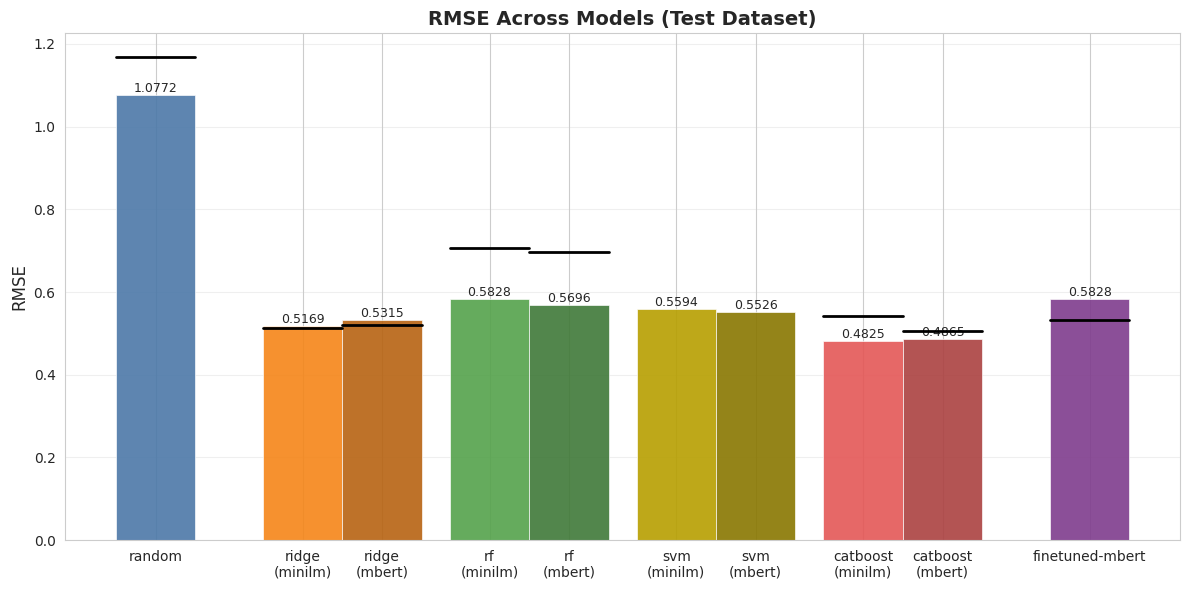

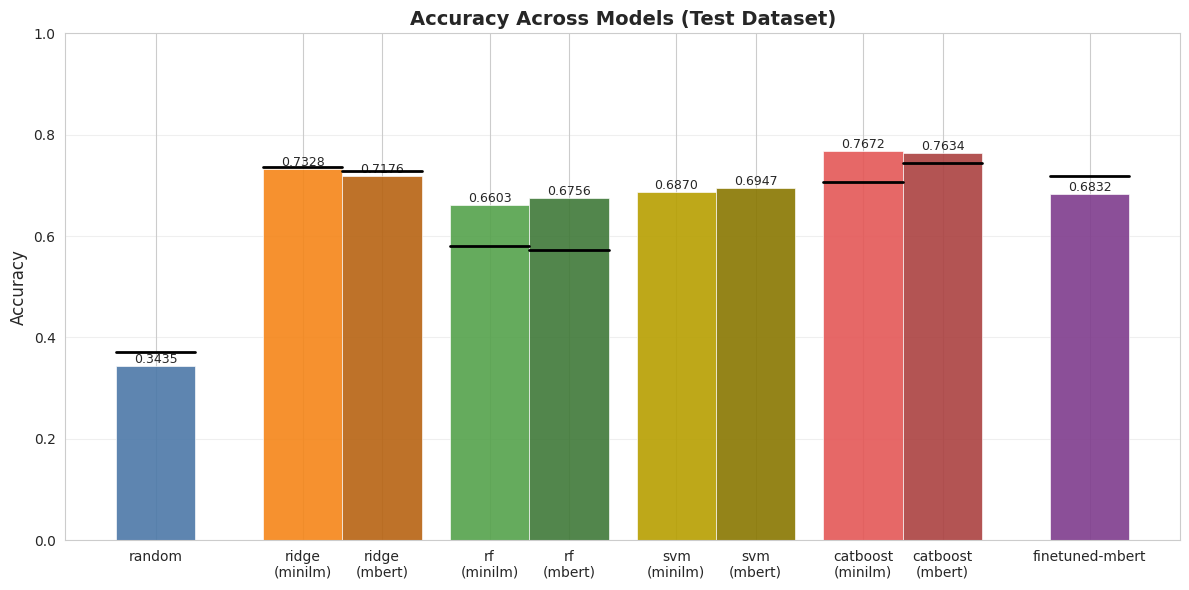

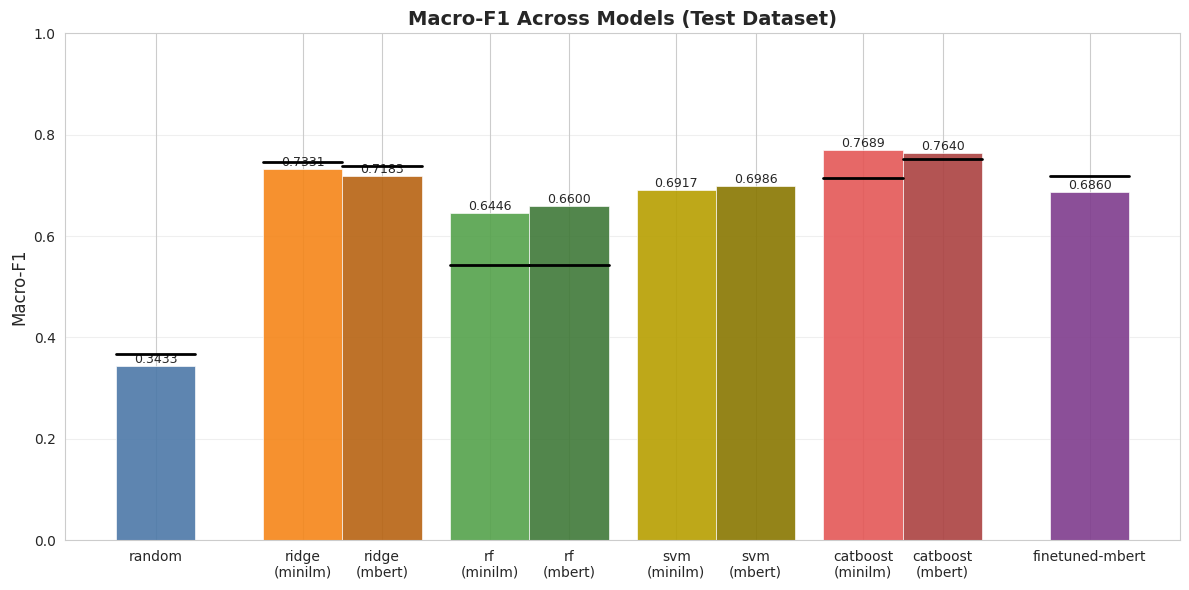

In [28]:
# All models: relaxed per-label plots on test split
vis_all_models_plots(aggregated_models, dataset="test", class_mode="relaxed")

In [5]:
# All models: relaxed comparison table (Train/Test, RMSE & Acc)
model_groups, show_large_variants = get_encoder_model_groups()
df_metrics_relaxed = vis_all_models_tables(
    aggregated_models,
    ["Acc"],
    ["Train", "Test"],
    model_groups,
    show_large_variants,
    class_mode="relaxed",
)
latex_table_relaxed = format_metrics_for_latex(df_metrics_relaxed)
print(latex_table_relaxed)

,Model,Train Acc,Test Acc
0,Random,0.3469,0.3435
1,(Large),0.3486,0.3702
2,Ridge,,
3,MiniLM,0.9107,0.7328
4,MBERT,0.9184,0.7176
5,MiniLM (Large),0.7771,0.7366
6,MBERT (Large),0.7893,0.7290
7,RandomForest,,
8,MiniLM,1.0000,0.6603
9,MBERT,1.0000,0.6756


\begin{tabular}{rrr}
\toprule
\textbf{Model} & \textbf{Train Acc} & \textbf{Test Acc} \\
\midrule
\textbf{Random} & 0.3469 & 0.3435 \\
(Large) & 0.3486 & 0.3702 \\
\textbf{Ridge} &  &  \\
MiniLM & 0.9107 & 0.7328 \\
MBERT & 0.9184 & 0.7176 \\
MiniLM (Large) & 0.7771 & 0.7366 \\
MBERT (Large) & 0.7893 & 0.7290 \\
\textbf{RandomForest} &  &  \\
MiniLM & \textbf{1.0000} & 0.6603 \\
MBERT & \textbf{1.0000} & 0.6756 \\
MiniLM (Large) & 0.9989 & 0.5802 \\
MBERT (Large) & 0.9647 & 0.5725 \\
\textbf{SVM} &  &  \\
MiniLM & 0.9949 & 0.6870 \\
MBERT & 0.9923 & 0.6947 \\
\textbf{CatBoost} &  &  \\
MiniLM & \textbf{1.0000} & \textbf{0.7672} \\
MBERT & \textbf{1.0000} & 0.7634 \\
MiniLM (Large) & 0.8484 & 0.7061 \\
MBERT (Large) & 0.8130 & 0.7443 \\
\textbf{FinetunedMBERT} & 0.9847 & 0.6832 \\
(Large) & 0.7454 & 0.7176 \\
\bottomrule
\end{tabular}

